<a href="https://colab.research.google.com/github/manu123416/c2q_study/blob/master/Linear_classifier_Actual_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implmenting the below Equation:

![image.png](attachment:image.png)

In [ ]:
import numpy as np 
from os import system as sys 
# np.set_printoptions(threshold=50)
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('files/weather.csv', parse_dates= True, index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [ ]:
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [ ]:
dataset = data[['Humidity3pm','Pressure3pm','RainTomorrow']].dropna()

In [ ]:
X = dataset[['Humidity3pm', 'Pressure3pm']].values 
y = dataset['RainTomorrow']
y = np.array([-1 if value == 'No' else 1 for value in y])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train 

array([[  33. , 1002.1],
       [  35. , 1011.7],
       [  48. , 1024.8],
       ...,
       [  32. , 1007.5],
       [  58. , 1014.5],
       [  14. , 1000. ]])

In [ ]:
# Define a function to train a linear classifier on the data

def linear_classifier(X, y, learning_rate=0.001, num_epochs=100):
    print("The value of X.shape", X.shape)
    num_features = X.shape[1] 
    
    weights = np.zeros(num_features)
    bias = 0
    
    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], weights) + bias
           
            y_pred = np.sign(linear_output)
            
           
            error = y[i] - y_pred
            # print("The value of error=", error)
            weights = weights + learning_rate * error * X[i]

            bias += learning_rate * error
            
    return weights, bias


In [ ]:

weights, bias = linear_classifier(X_train, y_train) 

The value of X.shape (2481, 2)


In [ ]:
weights

array([66.447 , -3.8279])

In [ ]:
bias 

0.033000000000000015

In [ ]:
# Apply the learned weights and bias to the test set
linear_output = np.dot(X_test, weights) + bias
linear_output
print("The shape of linear_output is =", linear_output.shape)

The shape of linear_output is = (828,)


In [ ]:
y_pred = np.sign(linear_output)

In [ ]:
# Compute the accuracy of the classifier on the test set
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7089371980676329


In [ ]:
# Generate a meshgrid of points that covers the entire range of humidity and pressure values in the dataset
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute the predicted labels for each point on the meshgrid using the learned weights and bias
Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
Z = Z.reshape(xx.shape)



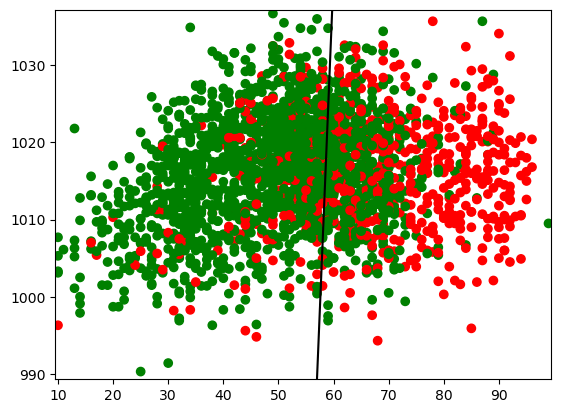

In [ ]:
# Plot the data points with different colors for different classes
desired_colors = ['r' if label == 1 else 'g' for label in y_train ]
# plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=desired_colors )

# Plot the decision boundary as a contour of the predicted labels
plt.contour(xx, yy, Z, levels=[0], colors='black')
